In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('fivethirtyeight')

In [ ]:
data = pd.read_csv('comments.csv')

In [ ]:
data.head()

,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0
1,jt2OHQh0HoQ,To be there with a samsung phone\nðŸ˜‚ðŸ˜‚ðŸ˜‚,1,0
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0
4,jt2OHQh0HoQ,Power is the disease.Â Care is the cure.Â Ke...,0,0


In [ ]:
data.head()

,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0
1,jt2OHQh0HoQ,To be there with a samsung phone\nðŸ˜‚ðŸ˜‚ðŸ˜‚,1,0
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0
4,jt2OHQh0HoQ,Power is the disease.Â Care is the cure.Â Ke...,0,0


In [ ]:
from textblob import TextBlob

In [ ]:
TextBlob('Its more accurate to call it the M+ (1000) be..').sentiment.polarity

0.45000000000000007

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.head()

,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0
1,jt2OHQh0HoQ,To be there with a samsung phone\nðŸ˜‚ðŸ˜‚ðŸ˜‚,1,0
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0
4,jt2OHQh0HoQ,Power is the disease.Â Care is the cure.Â Ke...,0,0


In [ ]:
polarity=[]

for i in data['comment_text']:
    polarity.append(TextBlob(i).sentiment.polarity)

In [ ]:
data['polarity']=polarity

In [ ]:
data.head()

,video_id,comment_text,likes,replies,polarity
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,0.45
1,jt2OHQh0HoQ,To be there with a samsung phone\nðŸ˜‚ðŸ˜‚ðŸ˜‚,1,0,0.00
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,0.00
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,0.00
4,jt2OHQh0HoQ,Power is the disease.Â Care is the cure.Â Ke...,0,0,1.00


In [ ]:
for index, row in data.iterrows():
    if row['polarity'] < 0:
        data.at[index, 'polarity'] = 0
    elif row['polarity'] > 0:
        data.at[index, 'polarity'] = 1

In [ ]:
data.head(10)

,video_id,comment_text,likes,replies,polarity
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,1.0
1,jt2OHQh0HoQ,To be there with a samsung phone\nðŸ˜‚ðŸ˜‚ðŸ˜‚,1,0,0.0
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,0.0
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,0.0
4,jt2OHQh0HoQ,Power is the disease.Â Care is the cure.Â Ke...,0,0,1.0
5,jt2OHQh0HoQ,Keep calm and buy iphone 8 Keep calm and buy i...,0,0,1.0
6,jt2OHQh0HoQ,i am a big fan of youtube and u !!!!!!!!!!!!!,0,0,0.0
7,jt2OHQh0HoQ,You will never find Losers who line up and pay...,0,0,0.0
8,jt2OHQh0HoQ,*APPLE JUST COMMENTED ON MY LAST VIDEO* I'm cr...,0,0,1.0
9,jt2OHQh0HoQ,"I'm only here to see Emma, I love her so much!...",0,0,1.0


In [ ]:
x = data['comment_text']
y = data['polarity']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20)

In [ ]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (1599,)
Shape of X_test:  (400,)
Shape of y_train:  (1599,)
Shape of y_test:  (400,)


In [ ]:
print(X_train[0])
print(y_train[0])

It's more accurate to call it the M+ (1000) because the price is closer than calling it the X (10).
1.0


In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=1500)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

In [ ]:
print(X_train[0])
print(y_train[0])

[2, 21, 4, 1205, 1206, 18, 53]
1.0


In [ ]:
from keras.preprocessing.sequence import pad_sequences

maxlen=100

X_train = pad_sequences(X_train,padding='post',maxlen=maxlen)
X_test = pad_sequences(X_test,padding='post',maxlen=maxlen)

print(X_train[4,:])

[  49  908   97  272 1207  132    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


In [ ]:
from keras.utils import to_categorical
num_classes = 2

y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test,num_classes)

print(y_train.shape)
print(y_train[0])

(1599, 2)
[1. 0.]


In [ ]:
data.shape

(1999, 5)

In [ ]:
from keras import Sequential
from keras.layers import Dense,Dropout,Activation,SimpleRNN
from keras import optimizers
import numpy as np

X_train = np.array(X_train).reshape((X_train.shape[0],X_train.shape[1],1))
print(X_train.shape)

X_test = np.array(X_test).reshape((X_test.shape[0],X_test.shape[1],1))
print(X_test.shape)

(1599, 100, 1)
(400, 100, 1)


In [ ]:
model = Sequential()
model.add(SimpleRNN(50, input_shape= (maxlen,1), return_sequences=False))
model.add(Dense(64,activation='relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary()
adam = optimizers.Adam(lr=0.001)
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                2600      
                                                                 
 dense (Dense)               (None, 64)                3264      
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                                 
 activation (Activation)     (None, 2)                 0         
                                                                 
Total params: 5994 (23.41 KB)
Trainable params: 5994 (23.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=3, min_lr=10e-7)

model.fit(X_train, y_train, epochs=100, callbacks=[reduce_lr])


Epoch 1/100
50/50 [==============================] - 3s 27ms/step - loss: 0.6788 - accuracy: 0.5804 - lr: 0.0010
Epoch 2/100
50/50 [==============================] - 2s 31ms/step - loss: 0.6813 - accuracy: 0.5672 - lr: 0.0010
Epoch 3/100
50/50 [==============================] - 1s 24ms/step - loss: 0.6732 - accuracy: 0.6029 - lr: 0.0010
Epoch 4/100
50/50 [==============================] - 1s 18ms/step - loss: 0.6762 - accuracy: 0.5772 - lr: 0.0010
Epoch 5/100
50/50 [==============================] - 1s 18ms/step - loss: 0.6657 - accuracy: 0.5966 - lr: 0.0010
Epoch 6/100
50/50 [==============================] - 1s 18ms/step - loss: 0.6579 - accuracy: 0.6060 - lr: 0.0010
Epoch 7/100
50/50 [==============================] - 1s 18ms/step - loss: 0.6565 - accuracy: 0.6285 - lr: 0.0010
Epoch 8/100
50/50 [==============================] - 1s 18ms/step - loss: 0.6524 - accuracy: 0.6160 - lr: 0.0010
Epoch 9/100
50/50 [==============================] - 1s 18ms/step - loss: 0.6512 - accuracy: 0.6

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np


y_test_ = np.argmax(y_test, axis=1)
y_pred = np.argmax(model.predict(X_test), axis=1)

accuracy = accuracy_score(y_test_, y_pred)
print("Accuracy:", accuracy)

13/13 [==============================] - 0s 6ms/step
Accuracy: 0.6575


In [ ]:
#a = ["WIFI is way slower than both our phones at the exact same location in our home. The phone is very slow when loading apps or just scrolling through web pages ."]
#a = ["A great product with a reasonable price."]
a = [" Packaging was best."]
a = tokenizer.texts_to_sequences(a)
a = np.array(a)
a = pad_sequences(a,padding='post',maxlen=maxlen)

a = a.reshape(a.shape[0],a.shape[1],1)


prediction = model.predict(np.array(a))
max_value = np.max(prediction)
print(prediction)

if prediction[0][0]>prediction[0][1]:
  print('Positive')
else:
  print('Negative')





1/1 [==============================] - 0s 25ms/step
[[0.6888635  0.31113645]]
Positive


In [ ]:
comments_positive=data[data['polarity']==1]
comments_positive.shape

(896, 5)

In [ ]:
comments_positive.head()

,video_id,comment_text,likes,replies,polarity
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,1.0
4,jt2OHQh0HoQ,Power is the disease.Â Care is the cure.Â Ke...,0,0,1.0
5,jt2OHQh0HoQ,Keep calm and buy iphone 8 Keep calm and buy i...,0,0,1.0
8,jt2OHQh0HoQ,*APPLE JUST COMMENTED ON MY LAST VIDEO* I'm cr...,0,0,1.0
9,jt2OHQh0HoQ,"I'm only here to see Emma, I love her so much!...",0,0,1.0


In [ ]:
from wordcloud import WordCloud,STOPWORDS
stopwords=set(STOPWORDS)
total_comments=' '.join(comments_positive['comment_text'])

In [ ]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_comments)

(-0.5, 999.5, 499.5, -0.5)

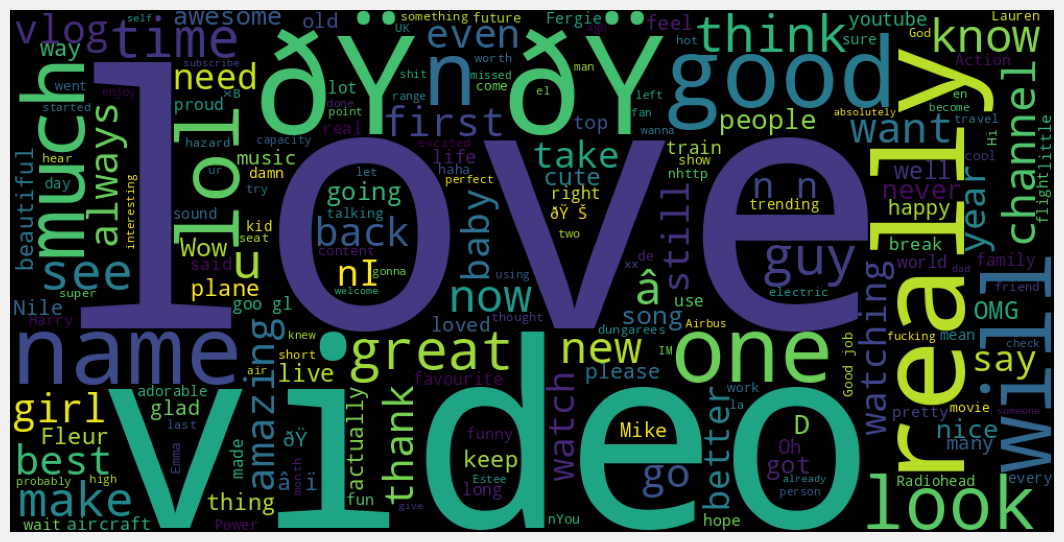

In [ ]:
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')

In [ ]:
comments_negative=data[data['polarity']==0]
comments_negative.shape

(1103, 5)

In [ ]:
comments_negative.head()

,video_id,comment_text,likes,replies,polarity
1,jt2OHQh0HoQ,To be there with a samsung phone\nðŸ˜‚ðŸ˜‚ðŸ˜‚,1,0,0.0
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,0.0
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,0.0
6,jt2OHQh0HoQ,i am a big fan of youtube and u !!!!!!!!!!!!!,0,0,0.0
7,jt2OHQh0HoQ,You will never find Losers who line up and pay...,0,0,0.0


In [ ]:
total_comments1=' '.join(comments_negative['comment_text'])
stopwords1=set(STOPWORDS)

In [ ]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords1).generate(total_comments1)

(-0.5, 999.5, 499.5, -0.5)

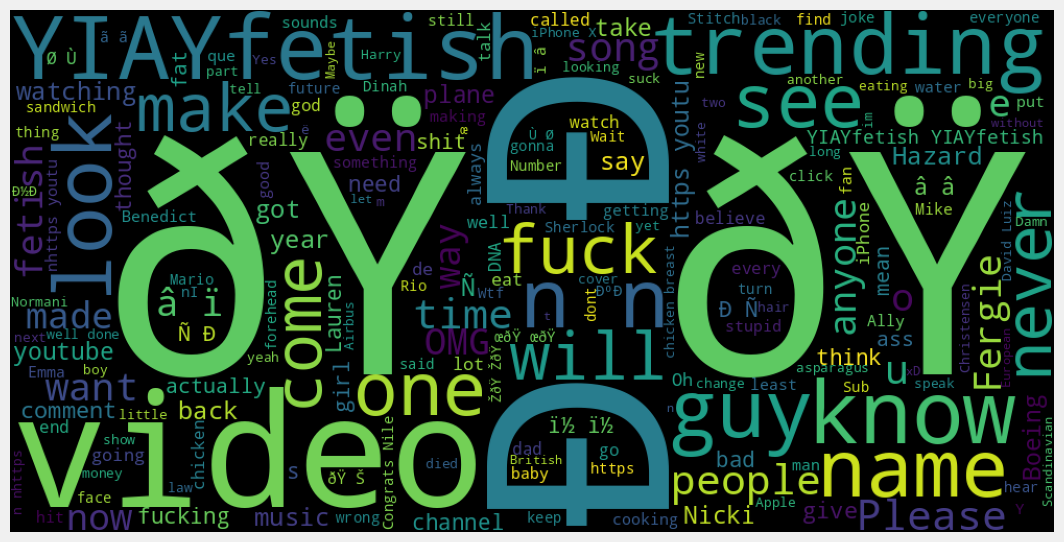

In [ ]:
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')